In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from scipy import stats

plt.rc('font', family='NanumBarunGothic') 

In [185]:
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf
#!pip install scipy --upgrade

In [186]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgames2.csv')
df=df.drop(['Unnamed: 0'],axis=1)

#df.isnull().sum() 결측치가 많으나 대체 힘듬 (년도 장르 제작사는 평균으로 대체도못함)

🕹️ Data Description  
>Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 제작한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다.  
EU_Sales : 유럽지역에서의 출고량입니다.  
JP_Sales : 일본지역에서의 출고량입니다.  
Other_Sales : 기타지역에서의 출고량입니다.  


>Sprint 1 : EDA, Feature Engineering, Data Manipulation, Data Visualization  
Sprint 2 : Hypothesis Test, CI, Bayesian  
Sprint 3 : DR, PCA, Cluster  



>지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.  
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.  
출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.  

In [187]:
pd.to_numeric(df['Year']) #숫자변경
for x in df['Year']: #년도에서 앞에 두글자 빠진거 채움    
    if 20<x <100 :        
        df['Year']=df['Year'].replace(x, x+1900) 
    elif x<20:
        df['Year']=df['Year'].replace(x, x+2000)
    else:pass

In [188]:
def Cutkm(KM) : #M K 제거 및 단위환산
    for x in KM:               
        c=0                
        for y in KM[x]: #M,K를 제거하고 숫자로 변환 후 그 자리에 다시 집어넣음
            if y[-1:]=='M':                               
                y=y[:-1]
                y=y.replace('M','')
                y=float(y)
                df[x][c]=y               
                c=c+1   
            elif y[-1:]=='K':
                y=y[:-1]
                y=y.replace('K','')
                y=float(y)
                y=y/1000
                df[x][c]=y              
                c=c+1  
            else:                              
                c=c+1
                y=float(y)                            
                #pd.to_numeric(y)
                #x.append(y)         
                     
Cutkm(df.iloc[:,5:])
df.iloc[:,5:]=df.iloc[:,5:].astype(float) #판매량 전부 숫자 변환


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [189]:
#['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
fn=[]
def same(v): #중복 되지않은값 체크 for 이상치 확인
    for x in v:                 
        n=set(df[x])
        globals()[format(x)]=n #pd.DataFrame(data=n) # 굳이 df로 바꿀필요가없음
        fn.append(x)
    #for x in fn:  #합치기 실패
        #Name[x]=x                 

same(df)        
print(Platform) # 플랫폼 전부 이상없음 2600이 아타리라서 고칠까했느데 그냥 2600으로 두기로함
print(Year) # 년도 이상치 위에서 제거
print(Genre) # 장르 결측치 제외 멀쩡
print(Publisher) # 퍼블리셔는 뭐 맞겠지..


{'SAT', 'DC', '2600', 'PS3', 'GB', 'PC', 'PS', 'SNES', 'NES', 'PS2', '3DO', 'NG', 'GBA', 'N64', 'PS4', 'XB', 'GG', 'XOne', 'SCD', 'PSV', 'GC', 'TG16', 'WiiU', 'GEN', 'Wii', '3DS', 'PCFX', 'DS', 'X360', 'PSP', 'WS'}
{nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

In [190]:
#지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.
df_losale=df[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']] #지역별 장르평균  판매량

for x in df_losale: #장르 기준 지역별 판매량의 평균을 각 이름으로 저장
    if x == 'Genre':pass    
    else:        
        globals()['lo{}'.format(x)]=df_losale[['Genre',x]].groupby(['Genre'],as_index=False).mean().sort_values(by=x,ascending=False).reset_index(drop=True)
        
#df_lona=df_losale[['Genre','NA_Sales']].groupby(['Genre'],as_index=False).mean().sort_values(by='NA_Sales',ascending=False).reset_index(drop=True)
lo=loNA_Sales
lo['NA_Sales']=loNA_Sales['Genre'] #한걸 lo에 합침
lo['EU_Sales']=loEU_Sales['Genre']
lo['JP_Sales']=loJP_Sales['Genre']
lo['Other_Sales']=loOther_Sales['Genre']
lo=lo.drop(['Genre'],axis=1) 
lo  #지역별 게임장르 평균 판매량 순위

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Platform,Shooter,Role-Playing,Shooter
1,Shooter,Platform,Platform,Racing
2,Sports,Racing,Fighting,Platform
3,Racing,Sports,Puzzle,Sports
4,Action,Action,Simulation,Action
5,Fighting,Simulation,Strategy,Fighting
6,Misc,Role-Playing,Misc,Misc
7,Role-Playing,Misc,Sports,Role-Playing
8,Puzzle,Fighting,Action,Simulation
9,Simulation,Puzzle,Racing,Puzzle


In [191]:
#각 지역별 정규화
df_losale1=df_losale.groupby(['Genre'],as_index=False).mean()
df_losale1['NA']=(df_losale1['NA_Sales']-df_losale1['NA_Sales'].min())/(df_losale1['NA_Sales'].max()-df_losale1['NA_Sales'].min())
df_losale1['EU']=(df_losale1['EU_Sales']-df_losale1['EU_Sales'].min())/(df_losale1['EU_Sales'].max()-df_losale1['EU_Sales'].min())
df_losale1['JP']=(df_losale1['JP_Sales']-df_losale1['JP_Sales'].min())/(df_losale1['JP_Sales'].max()-df_losale1['JP_Sales'].min())
df_losale1['OT']=(df_losale1['Other_Sales']-df_losale1['Other_Sales'].min())/(df_losale1['Other_Sales'].max()-df_losale1['Other_Sales'].min())
df_losale1=df_losale1.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
df_losale1
#귀무 : 지역별 게임 장르 선호는 같을것이다
fs, pv=f_oneway(df_losale1['NA'], df_losale1['EU'], df_losale1['JP'],df_losale1['OT']) #p = 0.3으로 지역별 게임 장르 선호는 같지않다고 볼수없다
print(fs,pv)


1.2476704272794088 0.30398491532889105


In [192]:
# np.concatenate를 통해 데이터를 합쳐 놓는다.
afs = np.concatenate([df_losale1['NA'], df_losale1['EU'], df_losale1['JP'],df_losale1['OT']])
labels = ['NA']*len(df_losale1['NA']) + ['EU']*len(df_losale1['EU']) + ['JP']*len(df_losale1['JP']) + ['OT']*len(df_losale1['OT'])#라벨
# 사후 검정
tukey_results = pairwise_tukeyhsd(afs, labels, 0.05)
print(tukey_results) #전부 False이므로 귀무가설을 기각할수없다  (True이면 귀무 기각)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    EU     JP  -0.2045 0.3391 -0.5269 0.1178  False
    EU     NA  -0.0553    0.9 -0.3776  0.267  False
    EU     OT  -0.0059    0.9 -0.3282 0.3164  False
    JP     NA   0.1492 0.5962 -0.1731 0.4715  False
    JP     OT   0.1986 0.3652 -0.1237 0.5209  False
    NA     OT   0.0494    0.9 -0.2729 0.3717  False
---------------------------------------------------


In [193]:
#연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.#['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df
#df_yt=df[['Year','Genre']].groupby(['Genre'],as_index=False).count()#.sort_values(by=x,ascending=False).reset_index(drop=True)
df_yt=df[['Year','Genre','Platform','Publisher']]
#df_yt=df_yt.corr()
df2008=df_yt[df_yt['Year']==2008]
df2008=df2008['Publisher'].value_counts()
df2008


Electronic Arts                 120
Ubisoft                         112
Activision                       88
Sega                             67
Konami Digital Entertainment     64
                               ... 
IE Institute                      1
AQ Interactive                    1
Gamebridge                        1
Crimson Cow                       1
Phenomedia                        1
Name: Publisher, Length: 165, dtype: int64

In [194]:
df_yt=df[['Year','Genre']].value_counts() #년도별 장르갯수
df_yt=pd.DataFrame(data=df_yt) #df로바꿔줌
#df_yt.groupby(['Year'],as_index=False) # 굳이 묶을필요가없었음
df_yt=df_yt.sort_values('Year').reset_index() #년도별 정렬
date=df_yt['Year'].astype(int).unique().tolist() # 날짜 고유 목록
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
b = pd.DataFrame(index=range(0), columns=[]) #빈 df
df_yt.rename(columns={0:'Counts'},inplace=True)
for x in date:
    #globals()['lo{}'.format(x)]=df_losale[['Genre',x]].groupby(['Genre'],as_index=False).mean().sort_values(by=x,ascending=False).reset_index(drop=True)
    a=df_yt[df_yt['Year']==x].sort_values(by=['Counts'],ascending=False).reset_index(drop=True) #날짜로 묶어서 가장많이 만든 장르순으로정렬
    a['Market Share']=round(a['Counts'][0]/(a['Counts'].sum()),2) #점유율
    b=b.append(a.iloc[:1,:])   # 맨위(가장많은값) 목록에 추가

#df_yt=df_yt[df_yt['Year']==1980].sort_values(by=[0],ascending=False)
#df_yt=df_yt.iloc[:1,:]
b


,Year,Genre,Counts,Market Share
0,1980.0,Misc,4,0.50
0,1981.0,Action,25,0.54
0,1982.0,Action,18,0.50
0,1983.0,Action,7,0.41
0,1984.0,Racing,3,0.21
0,1985.0,Puzzle,4,0.29
0,1986.0,Action,6,0.29
0,1987.0,Sports,4,0.25
0,1988.0,Platform,4,0.27
0,1989.0,Puzzle,5,0.29


In [195]:
df_yp=df[['Year','Platform']].value_counts()  #년도별 플랫폼갯수
df_yp=pd.DataFrame(data=df_yp)
df_yp=df_yp.sort_values('Year').reset_index()
c = pd.DataFrame(index=range(0), columns=[])
d = pd.DataFrame(index=range(0), columns=[])
df_yp.rename(columns={0:'Counts'},inplace=True)
for x in date:   
    c=df_yp[df_yp['Year']==x].sort_values(by=['Counts'],ascending=False).reset_index(drop=True)
    c['Market Share']=round(c['Counts'][0]/(c['Counts'].sum()),2)
    d=d.append(c.iloc[:1,:])   
d    

,Year,Platform,Counts,Market Share
0,1980.0,2600,9,1.00
0,1981.0,2600,46,1.00
0,1982.0,2600,36,1.00
0,1983.0,2600,11,0.65
0,1984.0,NES,13,0.93
0,1985.0,NES,11,0.79
0,1986.0,NES,19,0.90
0,1987.0,NES,10,0.62
0,1988.0,NES,11,0.73
0,1989.0,GB,10,0.59


In [196]:
df_ypw=df_yp.pivot_table(index='Year',columns='Platform',values='Counts',aggfunc='first')
#df_ypw=df_ypw.fillna(0) 0으로 채우니까 0까지 표시해서 더러움
df_ypw=df_ypw.reset_index()
df_ypw

df_ytw=df_yt.pivot_table(index='Year',columns='Genre',values='Counts',aggfunc='first')
df_ytw=df_ytw.reset_index()
df_ytw


Gen=list(Genre) #Set에서 List로 변환해서 Nan제거..

Gen=['Action','Fighting',
 'Adventure',
 'Strategy',
 'Simulation',
 'Sports',
 'Puzzle',
 'Shooter',
 'Action',
 'Platform',
 'Role-Playing',
 'Racing']
Gen

['Action',
 'Fighting',
 'Adventure',
 'Strategy',
 'Simulation',
 'Sports',
 'Puzzle',
 'Shooter',
 'Action',
 'Platform',
 'Role-Playing',
 'Racing']

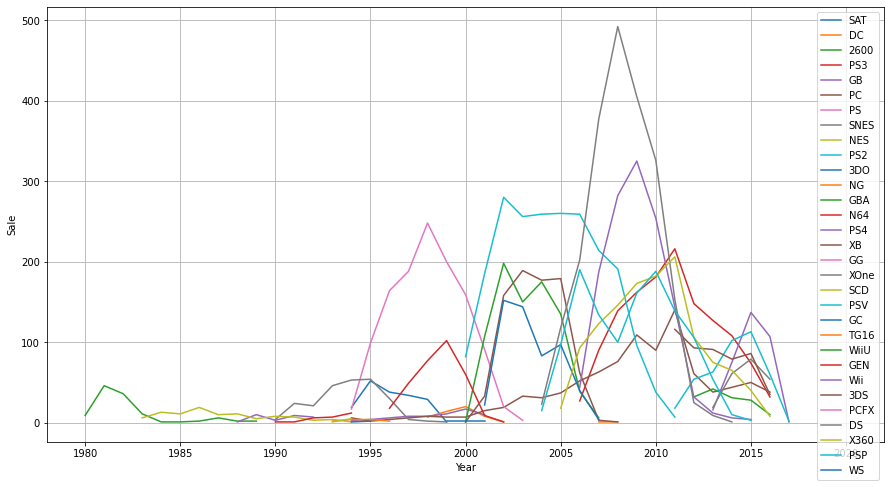

In [197]:
plt.figure(figsize=(15, 8)) #사이즈
plt.rcParams['axes.grid'] = True #그리드
for x in Platform: #그래프생성
    plt.plot(df_ypw['Year'],df_ypw[x],label=x)
plt.xlabel('Year')
plt.ylabel('Sale')    
plt.legend(loc=1)#라벨온
plt.show()#연도별 플랫폼



In [198]:
#대립:2016년도에 0이 아니라면 살아있는 플랫폼이다
#귀무:2016년도에 0일 것이다
#
df_s=df_sell[['Year','Platform','Total']]
df_s=df_s[df_s['Year']==2016]
df_s=df_s.reset_index(drop=True)
a=df_s
for x in Platform:
    a=df_s[df_s['Platform']==x]
    print(x,stats.ttest_1samp(a['Total'], 0))

#p=stats.ttest_ind(dfmsx,dfmdq,alternative='less').pvalue

SAT Ttest_1sampResult(statistic=nan, pvalue=nan)
DC Ttest_1sampResult(statistic=nan, pvalue=nan)
2600 Ttest_1sampResult(statistic=nan, pvalue=nan)
PS3 Ttest_1sampResult(statistic=5.536603554801188, pvalue=4.610382269101712e-06)
GB Ttest_1sampResult(statistic=nan, pvalue=nan)
PC Ttest_1sampResult(statistic=4.200168601228015, pvalue=0.0001610792387387018)
PS Ttest_1sampResult(statistic=nan, pvalue=nan)
SNES Ttest_1sampResult(statistic=nan, pvalue=nan)
NES Ttest_1sampResult(statistic=nan, pvalue=nan)
PS2 Ttest_1sampResult(statistic=nan, pvalue=nan)
3DO Ttest_1sampResult(statistic=nan, pvalue=nan)
NG Ttest_1sampResult(statistic=nan, pvalue=nan)
GBA Ttest_1sampResult(statistic=nan, pvalue=nan)
N64 Ttest_1sampResult(statistic=nan, pvalue=nan)
PS4 Ttest_1sampResult(statistic=4.885815540039382, pvalue=3.6709205994633573e-06)
XB Ttest_1sampResult(statistic=nan, pvalue=nan)
GG Ttest_1sampResult(statistic=nan, pvalue=nan)
XOne Ttest_1sampResult(statistic=4.376289174119011, pvalue=5.69944522907160

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [199]:
mtrend=pd.merge(b,d,on='Year')
mtrend

,Year,Genre,Counts_x,Market Share_x,Platform,Counts_y,Market Share_y
0,1980.0,Misc,4,0.50,2600,9,1.00
1,1981.0,Action,25,0.54,2600,46,1.00
2,1982.0,Action,18,0.50,2600,36,1.00
3,1983.0,Action,7,0.41,2600,11,0.65
4,1984.0,Racing,3,0.21,NES,13,0.93
5,1985.0,Puzzle,4,0.29,NES,11,0.79
6,1986.0,Action,6,0.29,NES,19,0.90
7,1987.0,Sports,4,0.25,NES,10,0.62
8,1988.0,Platform,4,0.27,NES,11,0.73
9,1989.0,Puzzle,5,0.29,GB,10,0.59


In [200]:
df['Name'].value_counts()
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [201]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다. #['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df_sell=df[['Name', 'Platform', 'Year', 'Genre', 'Publisher']]
df_sell['Total']=df.iloc[:,5:].sum(axis=1)
df_sell=df_sell.sort_values(by=['Total'],ascending=False).reset_index(drop=True) #출고량 순정리



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


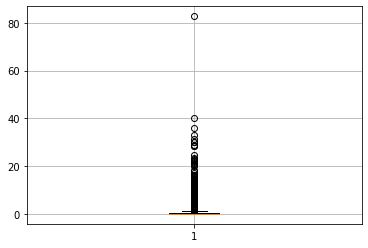

In [202]:
plt.boxplot(df_sell['Total'])
plt.show()

In [203]:
Q2=df_sell['Total'].describe()['50%']
Q3=df_sell['Total'].describe()['75%']
q9=df_sell['Total'].quantile(.9)
df_sell.head(10)


,Name,Platform,Year,Genre,Publisher,Total
0,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,28.61
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,28.31


In [204]:
df_sell3=df_sell.sort_values('Year')
df_sell3.dropna(subset=['Year'], how='all', inplace=True) #연도 기준으로 볼 것이기에 연도기준의 na만 삭제
df_sell3

,Name,Platform,Year,Genre,Publisher,Total
6388,Bridge,2600,1980.0,Misc,Activision,0.27
1966,Defender,2600,1980.0,Misc,Atari,1.05
1767,Kaboom!,2600,1980.0,Misc,Activision,1.15
7044,Checkers,2600,1980.0,Misc,Atari,0.23
544,Missile Command,2600,1980.0,Shooter,Atari,2.76
...,...,...,...,...,...,...
1150,No Man's Sky,PS4,2016.0,Action,Hello Games,1.60
16271,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.01
16241,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.01
14552,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.03


In [205]:
#연도별 판매량 상위 25퍼센트 게임 모음
date
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
b = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in date:   
    a=df_sell3[df_sell3['Year']==x].sort_values(by=['Total'],ascending=False).reset_index(drop=True) #날짜로 묶어서 가장많이 만든 장르순으로정렬
    a=a[a['Total']>a['Total'].quantile(.75)] #그해의 상위 25퍼센트    
    b=b.append(a)   # 목록에 추가
b.reset_index(inplace=True,drop=True)
df_top75=b
df_top75


,Name,Platform,Year,Genre,Publisher,Total
0,Asteroids,2600,1980.0,Shooter,Atari,4.31
1,Missile Command,2600,1980.0,Shooter,Atari,2.76
2,Pitfall!,2600,1981.0,Platform,Activision,4.50
3,Frogger,2600,1981.0,Action,Parker Bros.,2.20
4,Demon Attack,2600,1981.0,Shooter,Imagic,2.13
...,...,...,...,...,...,...
4056,Story of Seasons: Good Friends of the Three Vi...,3DS,2016.0,Simulation,Marvelous Interactive,0.19
4057,Kan Colle Kai,PSV,2016.0,Action,Kadokawa Games,0.19
4058,Odin Sphere: Leifthrasir,PS4,2016.0,Role-Playing,Nippon Ichi Software,0.18
4059,LEGO Marvel's Avengers,3DS,2016.0,Action,Warner Bros. Interactive Entertainment,0.17


In [206]:
df_top75g=df_top75[['Genre']].value_counts() #탑 25퍼 장르별 발매수
df_top75g=pd.DataFrame(data=df_top75g)
df_top75g.rename(columns={0:'Counts'},inplace=True)
df_top75g=df_top75g.reset_index()
df_top75g


,Genre,Counts
0,Action,860
1,Sports,641
2,Shooter,448
3,Role-Playing,398
4,Misc,374
5,Racing,326
6,Platform,288
7,Fighting,233
8,Simulation,200
9,Adventure,105


In [207]:
df_top75gt=df_top75[['Genre','Total']].sort_values('Genre').dropna()#탑 25 % 장르 토탈 카운트
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
b = pd.DataFrame(index=range(0), columns=[]) #빈 df
c = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in Gen:   
    a=df_top75gt[df_top75gt['Genre']==x]   
    at=pd.DataFrame({'Genre':[x],'Total':a['Total'].sum()})
    b=b.append(at)   # 목록에 추가
b=b.reset_index(drop=True)
b['Counts']=df_top75g['Counts']
b['Mean']=b['Total']/b['Counts']
b=b.sort_values(by=['Mean'],ascending=False).reset_index(drop=True) 
b

,Genre,Total,Counts,Mean
0,Role-Playing,737.22,88,8.377500
1,Racing,576.06,81,7.111852
2,Platform,707.10,105,6.734286
3,Action,1324.87,200,6.624350
4,Shooter,890.24,233,3.820773
5,Sports,997.42,326,3.059571
6,Action,1324.87,860,1.540547
7,Simulation,294.68,374,0.787914
8,Puzzle,172.10,288,0.597569
9,Fighting,342.20,641,0.533853


In [208]:
df_ypt=df_top75[['Year','Platform','Genre','Total']]#.value_counts() #년도별 플랫폼별 장르
#df_ygt=pd.DataFrame(data=df_ygt) #df로바꿔줌
df_ypt


,Year,Platform,Genre,Total
0,1980.0,2600,Shooter,4.31
1,1980.0,2600,Shooter,2.76
2,1981.0,2600,Platform,4.50
3,1981.0,2600,Action,2.20
4,1981.0,2600,Shooter,2.13
...,...,...,...,...
4056,2016.0,3DS,Simulation,0.19
4057,2016.0,PSV,Action,0.19
4058,2016.0,PS4,Role-Playing,0.18
4059,2016.0,3DS,Action,0.17


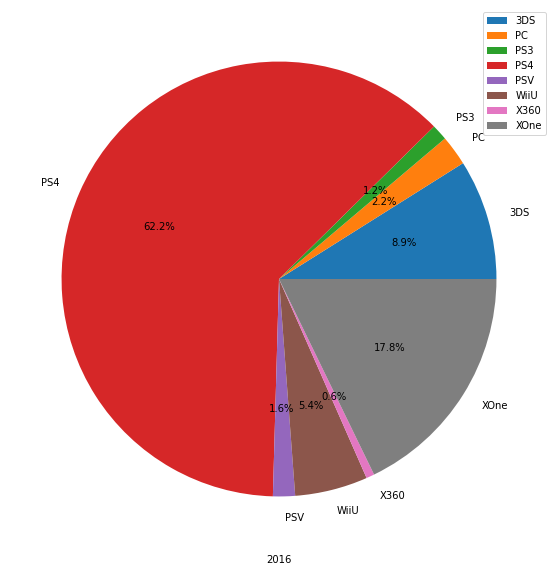

In [209]:
##연도기준 플랫폼별 판매량
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
yp = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in Year:
    a=df_ypt[df_ypt['Year']==x].groupby('Platform').sum()['Total']
    #f=pd.DataFrame(data=[f])
    a=pd.DataFrame({'Year':x,
                    'Total':a})
    a['Share']=a['Total']/a['Total'].sum()
    a=a.reset_index().set_index('Year')
    yp=yp.append(a)    
yp=yp.reset_index()
yp

##연도기준 플랫폼별 판매량 점유율 그래프
plt.figure(figsize=(10,10)) #사이즈
findy=2016 #찾을 년도
fy=yp[yp['Year']==findy]
plt.pie(fy['Share'], labels=fy['Platform'], autopct='%.1f%%')
plt.xlabel(findy)
plt.legend(loc=0)#라벨온
plt.show()

In [210]:
yp

,Year,Platform,Total,Share
0,1980.0,2600,7.07,1.000000
1,1981.0,2600,21.25,1.000000
2,1982.0,2600,16.39,1.000000
3,1983.0,2600,1.31,0.146697
4,1983.0,NES,7.62,0.853303
...,...,...,...,...
185,2016.0,PSV,0.95,0.016368
186,2016.0,WiiU,3.14,0.054101
187,2016.0,X360,0.35,0.006030
188,2016.0,XOne,10.33,0.177981


In [211]:


#plt.figure(figsize=(15, 8)) #사이즈
#plt.rcParams['axes.grid'] = True #그리드
#for x in Platform:
#    a=yp[['Platform','Total']]
#    a=yp[yp['Platform']==x]
#    plt.plot(yp['Year'],a['Total'],label=x)
#plt.xlabel('Year')
#plt.ylabel('Sale')    
#plt.legend(loc=1)#라벨온
#plt.show()#연도별 플랫폼



In [212]:
ypp=yp[yp['Platform']=='2600']
stats.shapiro(ypp['Share'])

(0.6297762393951416, 0.001240724348463118)

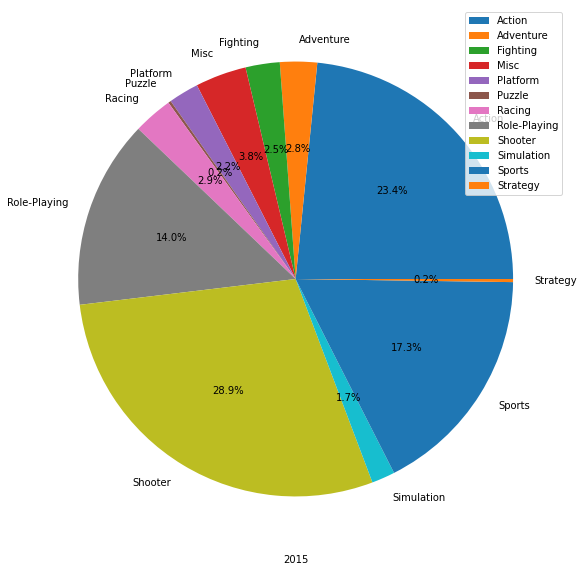

In [213]:
#연도기준 장르별 판매량
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
yg = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in Year:
    a=df_ypt[df_ypt['Year']==x].groupby('Genre').sum()['Total']
    #f=pd.DataFrame(data=[f])
    a=pd.DataFrame({'Year':x,
                    'Total':a})
    a['Share']=a['Total']/a['Total'].sum()
    a=a.reset_index().set_index('Year')
    yg=yg.append(a)    
yg=yg.reset_index()
yg

#연도기준 장르별 판매량 점유율 그래프
plt.figure(figsize=(10,10)) #사이즈
findy=2015 #찾을 년도
fy=yg[yg['Year']==findy]
plt.pie(fy['Share'], labels=fy['Genre'], autopct='%.1f%%')
plt.xlabel(findy)
plt.legend(loc=0)#라벨온
plt.show()


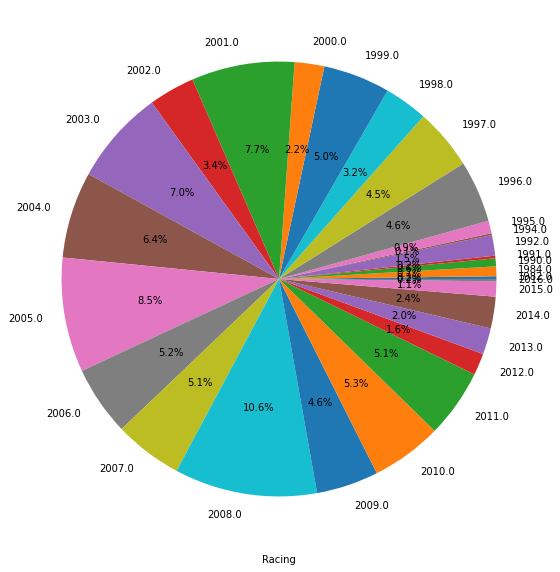

In [214]:
#장르기준 연도 판매량
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
gy = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in Gen:
    a=df_ypt[df_ypt['Genre']==x].groupby('Year').sum()['Total']
    #f=pd.DataFrame(data=[f])
    a=pd.DataFrame({'Genre':x,
                    'Total':a})
    a['Share']=a['Total']/a['Total'].sum()
    a=a.reset_index().set_index('Genre')
    gy=gy.append(a)    
gy=gy.reset_index()
gy
#['Action', 'Sports', 'Simulation', 'Racing', 'Misc', 'Platform', 'Strategy', 'Role-Playing', 'Adventure', 'Puzzle', 'Fighting', 'Shooter']
#연도기준 장르별 판매량 점유율 그래프

plt.figure(figsize=(10,10)) #사이즈
findy=Gen[11] #찾을 장르
fy=gy[gy['Genre']==findy]
plt.pie(fy['Share'], labels=fy['Year'], autopct='%.1f%%')
plt.xlabel(findy)
#plt.legend(loc=0)#라벨온
plt.show()





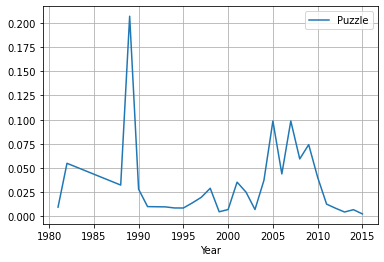

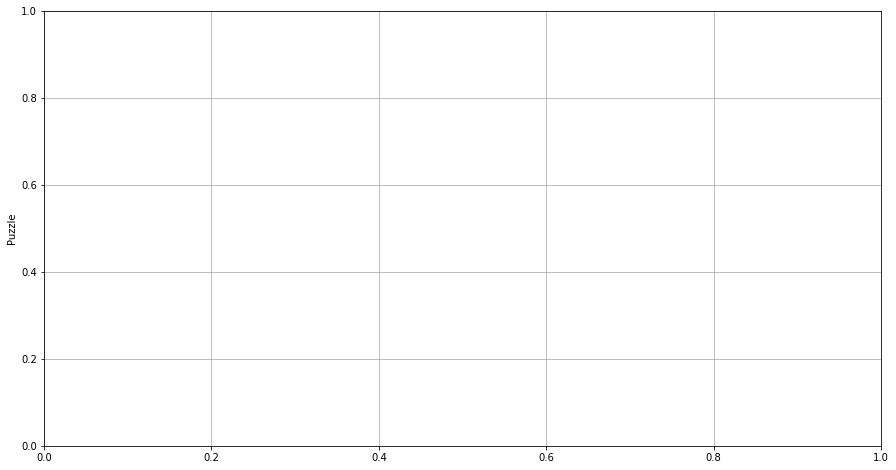

In [215]:
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
gy = pd.DataFrame(index=range(0), columns=[]) #빈 df
Gen2=['Puzzle']
for x in Gen2:
 #['Action', 'Sports', 'Simulation', 'Racing', 'Misc', 'Platform', 'Strategy', 'Role-Playing', 'Adventure', 'Puzzle', 'Fighting', 'Shooter']  
    a=df_ypt[df_ypt['Genre']==x].groupby('Year').sum()['Total']
   #f=pd.DataFrame(data=[f])
    a=pd.DataFrame({'Genre':x,
                    'Total':a})
    a['Share']=a['Total']/a['Total'].sum()
    a=a.reset_index().set_index('Genre')    
    plt.plot(a['Year'],a['Share'],label=x)
    plt.xlabel('Year')
    plt.legend(loc=0)
    

plt.figure(figsize=(15, 8)) #사이즈    
#plt.rcParams['axes.grid'] = True #그리드

plt.ylabel(x)      
#라벨온
plt.show()#연도별 장르


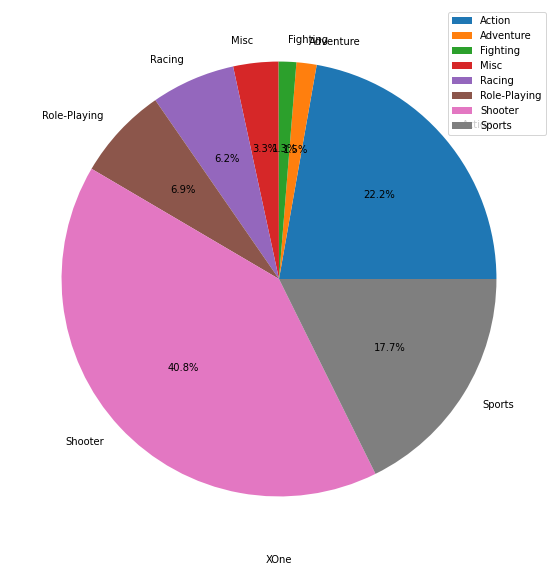

,Platform,Genre,Total,Share
0,SAT,Action,0.41,0.055480
1,SAT,Fighting,4.45,0.602165
2,SAT,Racing,1.16,0.156969
3,SAT,Role-Playing,0.38,0.051421
4,SAT,Shooter,0.99,0.133965
...,...,...,...,...
230,PSP,Role-Playing,31.78,0.169901
231,PSP,Shooter,16.95,0.090617
232,PSP,Simulation,3.96,0.021171
233,PSP,Sports,22.67,0.121198


In [228]:
#플랫폼기준 장르별 판매량
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
pg = pd.DataFrame(index=range(0), columns=[]) #빈 df
for x in Platform:
    a=df_ypt[df_ypt['Platform']==x].groupby('Genre').sum()['Total']
    #f=pd.DataFrame(data=[f])
    a=pd.DataFrame({'Platform':x,
                    'Total':a})
    a['Share']=a['Total']/a['Total'].sum()
    a=a.reset_index().set_index('Platform')
    pg=pg.append(a)  
pg=pg.reset_index()      
pg
#플랫폼기준 장르별 판매량 점유율그래프
#'PS4', 'TG16', 'GBA', 'PS2', 'WS', 'SCD', 'DC', 'XOne', '3DO', 'GC', 'WiiU', 'GG', 'SAT', 'DS', 'PCFX', 'NES', 'XB', '2600', 'PSP', 'SNES', '3DS', 'PC', 'PS', 'PS3', 'NG', 'N64', 'GB', 'Wii', 'PSV', 'X360', 'GEN'

plt.figure(figsize=(10,10)) #사이즈
findy='XOne' #찾을 플랫폼
fy=pg[pg['Platform']==findy]
plt.pie(fy['Share'], labels=fy['Genre'], autopct='%.1f%%')
plt.xlabel(findy)
plt.legend(loc=0)#라벨온
plt.show()



In [217]:
df_yt=df_top75[['Year','Genre']].value_counts() #년도별 장르갯수
df_yt=pd.DataFrame(data=df_yt) #df로바꿔줌
#df_yt.groupby(['Year'],as_index=False) # 굳이 묶을필요가없었음
df_yt=df_yt.sort_values('Year').reset_index() #년도별 정렬
date=df_yt['Year'].astype(int).unique().tolist() # 날짜 고유 목록
a = pd.DataFrame(index=range(0), columns=[]) #빈 df
b = pd.DataFrame(index=range(0), columns=[]) #빈 df
df_yt.rename(columns={0:'Counts'},inplace=True)
for x in date:
    #globals()['lo{}'.format(x)]=df_losale[['Genre',x]].groupby(['Genre'],as_index=False).mean().sort_values(by=x,ascending=False).reset_index(drop=True)
    a=df_yt[df_yt['Year']==x].sort_values(by=['Counts'],ascending=False).reset_index(drop=True) #날짜로 묶어서 가장많이 만든 장르순으로정렬
    a['Market Share']=round(a['Counts'][0]/(a['Counts'].sum()),2) #점유율
    b=b.append(a.iloc[:1,:])   # 맨위(가장많은값) 목록에 추가

#df_yt=df_yt[df_yt['Year']==1980].sort_values(by=[0],ascending=False)
#df_yt=df_yt.iloc[:1,:]



In [218]:
df_yp=df_top75[['Year','Platform']].value_counts()  #년도별 플랫폼갯수
df_yp=pd.DataFrame(data=df_yp)
df_yp=df_yp.sort_values('Year').reset_index()
c = pd.DataFrame(index=range(0), columns=[])
d = pd.DataFrame(index=range(0), columns=[])
df_yp.rename(columns={0:'Counts'},inplace=True)
for x in date:   
    c=df_yp[df_yp['Year']==x].sort_values(by=['Counts'],ascending=False).reset_index(drop=True)
    c['Market Share']=round(c['Counts'][0]/(c['Counts'].sum()),2)
    d=d.append(c.iloc[:1,:])   


In [219]:
mtrend=pd.merge(b,d,on='Year')
mtrend

,Year,Genre,Counts_x,Market Share_x,Platform,Counts_y,Market Share_y
0,1980.0,Shooter,2,1.00,2600,2,1.00
1,1981.0,Shooter,6,0.50,2600,12,1.00
2,1982.0,Platform,3,0.38,2600,8,1.00
3,1983.0,Platform,2,0.50,NES,3,0.75
4,1984.0,Sports,2,0.50,NES,4,1.00
5,1985.0,Platform,2,0.50,NES,4,1.00
6,1986.0,Action,2,0.40,NES,5,1.00
7,1987.0,Fighting,2,0.50,NES,4,1.00
8,1988.0,Platform,2,0.50,NES,4,1.00
9,1989.0,Puzzle,2,0.50,GB,3,0.75


In [231]:
#플랫폼장 장르선택별확률

pg_3d=pg[pg['Platform']=='3DS']
pg_3d['Wish%']=pg_3d['Share']*0.08*100
pg_3d
pg_ps4=pg[pg['Platform']=='PS4']
pg_ps4['Wish%']=pg_ps4['Share']*0.622*100
pg_X=pg[pg['Platform']=='XOne']
pg_X['Wish%']=pg_X['Share']*0.178*100
pg_X

pg_3d=pg_3d.append(pg_ps4).append(pg_X)
pg_3d=pg_3d.sort_values(by='Wish%',ascending=False)
pg_3d=pg_3d.reset_index(drop=True)
pg_3d=pg_3d.drop('Total',axis=1)
pg_3d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,Platform,Genre,Share,Wish%
0,PS4,Action,0.302565,18.819562
1,PS4,Shooter,0.293634,18.264031
2,PS4,Sports,0.190353,11.839928
3,XOne,Shooter,0.407766,7.258238
4,PS4,Role-Playing,0.089196,5.547978
5,XOne,Action,0.222240,3.955878
6,XOne,Sports,0.176815,3.147314
7,PS4,Racing,0.040408,2.513354
8,3DS,Role-Playing,0.289248,2.313985
9,3DS,Action,0.216786,1.734287


In [221]:
Year=[1980.0,1981.0,1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 2017.0,
 2020.0]

In [222]:
df0=df_sell[['Name','Year','Genre','Platform','Total']].sort_values('Year')
df0=df0.dropna(subset=['Year'], how='all', )
df0=df0.reset_index()
df1=df0.groupby(['Year','Genre','Platform']).sum()['Total']
df1=pd.DataFrame(df1) #연도별 장르별 플랫폼
df1=df1.reset_index()

df2=df0.groupby('Year').sum()['Total']
df2=pd.DataFrame(df2) #연도별 장르별 플랫폼


df3=pd.merge(df1,df2,how='inner',on='Year')
#df3['Share']
df3['Share']=df3['Total_x']/df3['Total_y']
df3=df3.sort_values(by='Year')


asd=[]
cc=[]
for x in Year:
    vv=df0[df0['Year']==x]
    vv=set(vv['Genre'])    
    vv=1/len(vv)
    asd.append(x)
    cc.append(vv)


df4 = pd.DataFrame({'Year':asd,
                    'CC':cc})
df3=pd.merge(df3,df4,how='inner',on='Year') 
df3=df3.loc[df3['Share']>df3['CC']]
df3=df3.reset_index(drop=True)
df3.tail(50)



,Year,Genre,Platform,Total_x,Total_y,Share,CC
35,1995.0,Platform,SNES,10.04,88.11,0.113948,0.083333
36,1996.0,Role-Playing,GB,31.65,199.15,0.158925,0.076923
37,1996.0,Action,PS,16.66,199.15,0.083656,0.076923
38,1997.0,Racing,PS,24.26,201.07,0.120654,0.083333
39,1997.0,Role-Playing,PS,19.56,201.07,0.097280,0.083333
40,1997.0,Sports,PS,23.61,201.07,0.117422,0.083333
41,1997.0,Action,PS,22.52,201.07,0.112001,0.083333
42,1998.0,Sports,PS,29.63,256.33,0.115593,0.076923
43,1998.0,Racing,PS,20.67,256.33,0.080638,0.076923
44,1998.0,Action,PS,29.28,256.33,0.114228,0.076923


In [223]:
df_ytw1=df_ytw.fillna(0)
df_ytw1
#대립:연도별 장르의 판매량은 다르고 유행이있을것이다
#귀무:연도별 장르의 판매량은 비슷해서 유행은없을것이다

fs, pv=f_oneway(df_ytw1['Action'], df_ytw1['Adventure'],df_ytw1['Fighting'],df_ytw1['Misc'],df_ytw1['Platform'],df_ytw1['Puzzle'],df_ytw1['Racing'],df_ytw1['Role-Playing'],df_ytw1['Shooter'],df_ytw1['Simulation'],df_ytw1['Sports'],df_ytw1['Strategy'])
#p = 0으로 연도별 장르의 판매량은 다르고 유행이있을것이다
print(fs,pv)



6.977493332569472 5.988229153302235e-11


In [224]:
#각 지역별 정규화
df_losale1=df_losale.groupby(['Genre'],as_index=False).mean()
df_losale1['NA']=(df_losale1['NA_Sales']-df_losale1['NA_Sales'].min())/(df_losale1['NA_Sales'].max()-df_losale1['NA_Sales'].min())
df_losale1['EU']=(df_losale1['EU_Sales']-df_losale1['EU_Sales'].min())/(df_losale1['EU_Sales'].max()-df_losale1['EU_Sales'].min())
df_losale1['JP']=(df_losale1['JP_Sales']-df_losale1['JP_Sales'].min())/(df_losale1['JP_Sales'].max()-df_losale1['JP_Sales'].min())
df_losale1['OT']=(df_losale1['Other_Sales']-df_losale1['Other_Sales'].min())/(df_losale1['Other_Sales'].max()-df_losale1['Other_Sales'].min())
df_losale1=df_losale1.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
df_losale1
#귀무 : 지역별 게임 장르 선호는 같을것이다
fs, pv=f_oneway(df_losale1['NA'], df_losale1['EU'], df_losale1['JP'],df_losale1['OT']) #p = 0.3으로 지역별 게임 장르 선호는 같지않다고 볼수없다
print(fs,pv)

# np.concatenate를 통해 데이터를 합쳐 놓는다.
afs = np.concatenate([df_losale1['NA'], df_losale1['EU'], df_losale1['JP'],df_losale1['OT']])
labels = ['NA']*len(df_losale1['NA']) + ['EU']*len(df_losale1['EU']) + ['JP']*len(df_losale1['JP']) + ['OT']*len(df_losale1['OT'])#라벨
# 사후 검정
tukey_results = pairwise_tukeyhsd(afs, labels, 0.05)
print(tukey_results) #전부 False이므로 귀무가설을 기각할수없다  (True이면 귀무 기각)

1.2476704272794088 0.30398491532889105
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    EU     JP  -0.2045 0.3391 -0.5269 0.1178  False
    EU     NA  -0.0553    0.9 -0.3776  0.267  False
    EU     OT  -0.0059    0.9 -0.3282 0.3164  False
    JP     NA   0.1492 0.5962 -0.1731 0.4715  False
    JP     OT   0.1986 0.3652 -0.1237 0.5209  False
    NA     OT   0.0494    0.9 -0.2729 0.3717  False
---------------------------------------------------


In [297]:
df01=df0[df0['Year']==2016]
df01
a=df01
for x in ['3DS','PC','PS3','PSV','WiiU','X360','XOne','PS4']:
    a=df01[df01['Platform']==x]
    #print(x,stats.ttest_1samp(a['Total'], 0))

df08=df01
df08=df08[df08['Genre']=='Action']
df08
nana=[]
for x in df08['Name']:
    try :nana.append(x.split(' '))
    except:nana.append(x)


p=[]#2016년도 액션게임의 단어 합산
pp=[]
n=[]
cn=0
for x in nana:
    for c in x:
            pp.append(c.upper())
        
for x in nana:
    for c in x:
        if c.upper() in p:
            pass
        else:
            p.append(c.upper())
            n.append(pp.count(c.upper()))
            
           
        
#for x in p:
#    n.append(p.count(x))
print(p)
print(n)       
nana=pd.DataFrame({'Word':p,
                   'Count':n})
nana=nana.sort_values(by='Count',ascending=False)
nana=nana.reset_index(drop=True)
nana.head(20)

['TERRARIA', 'DRAGON', 'QUEST', 'HEROES', 'II:', 'TWIN', 'KINGS', 'AND', 'THE', "PROPHECY'S", 'END', 'FAR', 'CRY:', 'PRIMAL', 'YOKAI', 'SANGOKUSHI', 'LEGEND', 'OF', 'ZELDA:', 'TWILIGHT', 'PRINCESS', 'HD', 'PRISON', 'ARCHITECT', 'KAMEN', 'RIDER:', 'BATTRIDE', 'WAR', 'GENESIS', 'ANIMA', '-', 'GATE', 'MEMORIES', 'RESIDENT', 'EVIL', 'ZERO', 'SUMMON', 'NIGHT', '6:', 'LOST', 'BORDERS', 'GHOSTBUSTERS', '(2016)', 'WORMS:', 'WMD', 'LEGO', 'STAR', 'WARS:', 'FORCE', 'AWAKENS', 'ANSATSU', 'KYOUSHITSU:', 'ASSASSIN', 'IKUSEI', 'KEIKAKU!!', 'PUZZLE', '&', 'DRAGONS', 'X:', 'GOD', 'CHAPTER', '/', 'DEAD', 'ISLAND', 'DEFINITIVE', 'COLLECTION', 'DIGIMON', 'WORLD:', 'NEXT', 'ORDER', 'QUANTUM', 'BREAK', 'ATTACK', 'ON', 'TITAN', '(KOEI)', 'SONG', 'DEEP', 'SENGOKU', 'BASARA:', 'SANADA', 'YUKIMURA-DEN', 'ROSE', 'TO', 'TASOGARE', 'NO', 'KOJOU', 'ZOMBIU', 'TAIKO', 'TATSUJIN:', 'DON', 'DON!', 'MYSTERY', 'ADVENTURE', 'EVIL:', 'UMBRELLA', 'CORPS', 'AEGIS', 'EARTH:', 'PROTONOVUS', 'ASSAULT', 'KIRBY:', 'PLANET', 'ROB

,Word,Count
0,THE,20
1,LEGO,14
2,OF,11
3,FORCE,8
4,NO,8
5,AWAKENS,7
6,MARVEL'S,7
7,AVENGERS,7
8,STAR,7
9,WARS:,7


TypeError: ignored

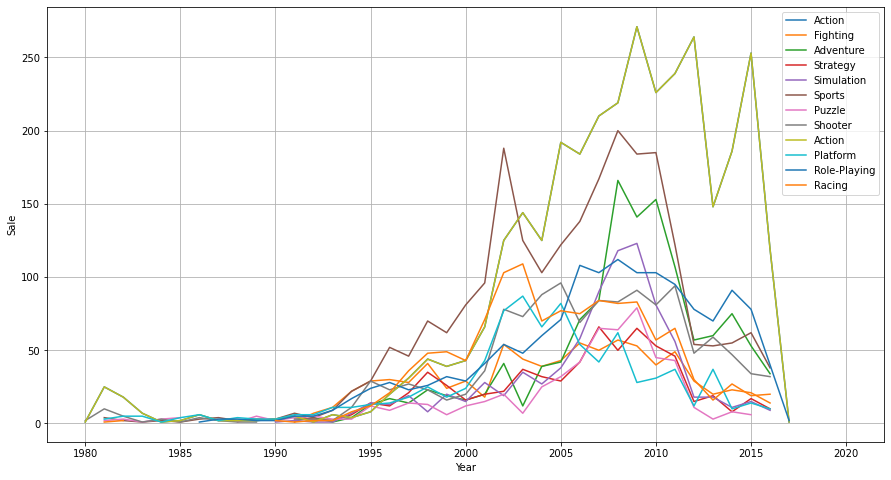

In [226]:
plt.figure(figsize=(15, 8)) #사이즈
plt.rcParams['axes.grid'] = True #그리드
for x in Gen: #그래프생성
    plt.plot(df_ytw['Year'],df_ytw[x],label=x)
plt.xlabel('Year')
plt.ylabel('Sale')    
plt.legend(loc=1)#라벨온
plt.show()#연도별 장르